# Moyenne, Etendue et Médiane

Utilisation de PYTHON pour calculer des moyennes et des médianes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2)

# Nombre de notes que l'on veut créer
nb_notes = 15
# Moyenne qu'on souhaite à peu près avoir
moyenne_voulue = 12
# Ecart entre les notes (plus la valeur est grande, plus elle pourront s'éloigner de la moyenne désirée)
ecart_type = 5

#np.random.seed(6)
notes = np.random.normal(moyenne_voulue, ecart_type, nb_notes)

for i in range(len(notes)):
    if notes[i]<0:
        notes[i] = 0
    if notes[i]>20:
        notes[i] = 20
    notes[i] = np.round(notes[i],2)
        
print('Notes :', notes)

Notes : [  7.12  10.66  11.87   8.63   2.4    7.17  15.91  16.63   8.22   8.74
   7.61   3.87  13.02  15.42   6.34]


### Moyenne arithmétique

$\displaystyle \overline{x} = \frac{1}{n} \sum_{i=1}^{n}x_{i} $


In [2]:
nombre_de_notes = len(notes)
print('Nombre de notes :', nombre_de_notes)
total_des_notes = sum(notes)
print('Total des notes :', total_des_notes)
moyenne = total_des_notes / nombre_de_notes
print('Moyenne des notes :', moyenne)

# On peut créer une fonction qui fera tout ce calcul pour nous :
def moyenne(ensemble):
    taille_ensemble = len(ensemble)
    total = sum(ensemble)
    return total / taille_ensemble

#le résultat est le même :
print('Moyenne calculée par la fonction :', moyenne(notes))

Nombre de notes : 15
Total des notes : 143.61
Moyenne des notes : 9.574
Moyenne calculée par la fonction : 9.574


### Médiane

In [3]:
# Pour la médiane, on crée aussi une fonction pour pouvoir ensuite l'utiliser de nombreuses fois
def mediane(ensemble):
    ensemble_trie = np.sort(ensemble)
    taille_de_l_ensemble = len(ensemble_trie)
    
    if taille_de_l_ensemble%2 > 0:
        # Nombre impair d'éléments, on prend simplement l'élément du milieu, ex : [1,2,4, 6, 10] : on prend 4.
        mediane = ensemble_trie[int((taille_de_l_ensemble+1)/2-1)]  # On doit faire -1, car le tableau commence à l'index 0.
    else:
        # Nombre pair d'éléments, on prend la moyenne des deux valeurs au centre de l'ensemble
        # ex : [1,3,4,6,7,9] : (4+6)/2 = 5
        valeur_1 = ensemble_trie[int((taille_de_l_ensemble/2) - 1)]
        valeur_2 = ensemble_trie[int(taille_de_l_ensemble/2)]
        mediane = (valeur_1 + valeur_2)/2
    
    return mediane

print('mediane([1,17,3,22,5]):', mediane([1,17,3,22,5]))
print('mediane([23,5,123,12,78,22200])', mediane([23,5,123,12,78,22200]))
print('mediane des notes {} : {}'.format(notes, mediane(notes)))
print('Rappel de la moyenne : ', moyenne(notes))



mediane([1,17,3,22,5]): 5
mediane([23,5,123,12,78,22200]) 50.5
mediane des notes [  7.12  10.66  11.87   8.63   2.4    7.17  15.91  16.63   8.22   8.74
   7.61   3.87  13.02  15.42   6.34] : 8.63
Rappel de la moyenne :  9.574


### Différence entre moyenne et médiane
Exemple où la moyenne et la médiane sont très différentes :  
Un village avec 10 habitants qui travaillent, leur salaire est de 1000€ en moyenne, ils gagnent tous entre 800€ et 1200€  
Un autre village avec encore 10 habitants dont le salaire moyen est de 2000€.... et pourtant 9 d'entre eux ne gagnent presque rien

In [4]:
salaires_village_1 = [800, 1200, 900, 1100, 850, 1150, 1000, 1000, 1050, 950]
salaires_village_2 = [80, 120, 90, 110, 85, 115, 100, 100, 100, 19100]

print('Salaire moyen dans le village 1 :', moyenne(salaires_village_1))
print('Salaire médian dans le village 1 :', mediane(salaires_village_1))
print("Le village 1 est homogène, ses salaires son égalitaires, car il y a peu d'écart entre les gens")
print('\nSalaire moyen dans le village 2 :', moyenne(salaires_village_2))
print('Salaire médian dans le village 2 :', mediane(salaires_village_2))
print("Le village 2 est hétérogène, une majorité de gens gagnent peu, et un petit groupe (ici 1 personne), gagne beaucoup")
print("La moyenne est élevée, mais pourtant 9 villageois sur 10, la majorité, gagne 10 fois moins que la moyenne")
print("Le salaire médian est plus représentatif, il montre que si on gagne 100, alors on gagne a peu près comme tout le monde,")
print("c'est à dire que la moitié des gens gagnent plus que nous, et l'autre moitié gagne moins.")


Salaire moyen dans le village 1 : 1000.0
Salaire médian dans le village 1 : 1000.0
Le village 1 est homogène, ses salaires son égalitaires, car il y a peu d'écart entre les gens

Salaire moyen dans le village 2 : 2000.0
Salaire médian dans le village 2 : 100.0
Le village 2 est hétérogène, une majorité de gens gagnent peu, et un petit groupe (ici 1 personne), gagne beaucoup
La moyenne est élevée, mais pourtant 9 villageois sur 10, la majorité, gagne 10 fois moins que la moyenne
Le salaire médian est plus représentatif, il montre que si on gagne 100, alors on gagne a peu près comme tout le monde,
c'est à dire que la moitié des gens gagnent plus que nous, et l'autre moitié gagne moins.


Pour mieux se rendre compte des différences, on peut faire un __graphique__. 
Comme on va utiliser et créer plusieurs fois le même graphique, on crée une fonction

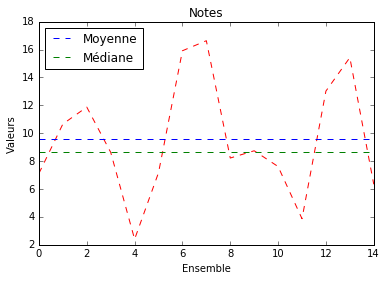

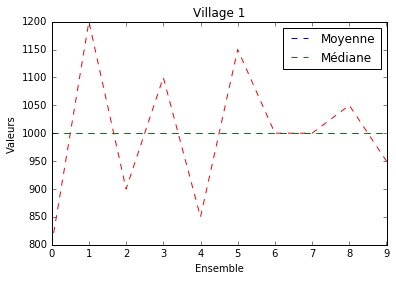

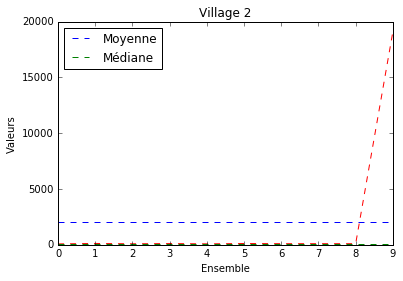

In [6]:
# Pour mieux se rendre compte des différences, on peut faire un graphique. 
# Comme on va utiliser et créer plusieurs fois le même graphique, on crée une fonction

def affiche_graphique(titre, ensemble):
    taille = len(ensemble)
    #On peut appeler d'autres fonctions (moyenne, mediane) dans une fonction
    moy = moyenne(ensemble)
    med = mediane(ensemble)
    
    plt.plot(range(taille), ensemble, 'r--')
    #plt.ylim(ymin=0, ymax=20)
    plt.xlabel('Ensemble')
    plt.ylabel('Valeurs')

    moy_line = plt.plot(range(taille), np.full(taille,moyenne(ensemble)), label='Moyenne', linestyle='--')
    med_line = plt.plot(range(taille), np.full(taille,mediane(ensemble)), label='Médiane', linestyle='--')
    plt.legend(loc='best')
    plt.title(titre)
    plt.show()
    
affiche_graphique('Notes', notes)
affiche_graphique('Village 1', salaires_village_1)
affiche_graphique('Village 2', salaires_village_2)

### Quartile....
On cherche le premier quartile tel que 25% des valeurs lui soient inférieures.  
Puis on cherche le deuxième quartile tel que 50% des valeurs lui soient inférieures.  
Finalement on cherche le troisième quartile tel que 75% des valeurs lui soient inférieures.

Cela suffit pour séparer en 4 : 0-----1er quartile------deuxième quartile------- troisième quartile-----------max



In [32]:
import math
def calcule_quartiles(ensemble):
    ensemble_trie = sorted(ensemble)
    taille = len(ensemble_trie)
    quartile_1 = taille/4 # Le nombre obtenu peut-être un nombre à virgule
    quartile_1 = math.ceil(quartile_1) # On arrondit à l'entier supérieur
    quartile_2 = taille/2
    quartile_2 = math.ceil(quartile_2) # On arrondit à l'entier supérieur
    quartile_3 = (taille/4)*3
    quartile_3 = math.ceil(quartile_3)
    
    # On renvoie les quartiles et leur valeur associée dans un tableau
    # Comme les indices de tableau démarrent à zéro en python, on pense à retrancher 1.
    quartiles = []
    quartile = [quartile_1-1, ensemble_trie[quartile_1-1]]
    quartiles.append(quartile)
    quartile = [quartile_2-1, ensemble_trie[quartile_2-1]]
    quartiles.append(quartile)
    quartile = [quartile_3-1, ensemble_trie[quartile_3-1]]
    quartiles.append(quartile)
    
    return ensemble_trie, quartiles

def affiche_quartiles(ensemble):
    ensemble_trie, quartiles = calcule_quartiles(ensemble)
    # On affiche proprement ce qu'on a calculé
    print('Ensemble à traiter :', ensemble)
    print('Ensemble trié :', ensemble_trie)
    for i in range(len(quartiles)):
        population = quartiles[i][0]+1
        print('Quartile {} : population {}, valeur : {}'.format(i+1, population, quartiles[i][1]))

    return

test = [1,3,4,76,43,22,45,32,12,12,12,54,54]
affiche_quartiles(test)



Ensemble à traiter : [1, 3, 4, 76, 43, 22, 45, 32, 12, 12, 12, 54, 54]
Ensemble trié : [1, 3, 4, 12, 12, 12, 22, 32, 43, 45, 54, 54, 76]
Quartile 1 : population 4, valeur : 12
Quartile 2 : population 7, valeur : 22
Quartile 3 : population 10, valeur : 45


## Ensemble avec effectif.

Souvent dans les exercices, on a un tableau avec deux lignes : effectifs et valeurs.  
On va donc adapter les fonctions pour que cela puisse prendre ce type de tableau.

[http://www.maxicours.com/soutien-scolaire/mathematiques/1re-s/17751.html] (Exemple avec tableau des retards)

In [54]:
import math
### ATTENTION, ici on part du principe que l'ensemble qui est passé est déjà trié.
def calcule_quartiles_effectifs(ensemble):
    
    # Déclaration d'une fonction dans la fonction :)
    def trouve_valeur(ensemble, quartile):
        eff = 0
        for i in range(len(ensemble)):
            if eff > quartile:
                return ensemble[i-1][0]
            eff = eff + ensemble[i][1]
        return ensemble[i][0]
    
    effectif_total = 0
    for i in range(len(ensemble)):
        effectif_total = effectif_total + ensemble[i][1]  # 1 car les tableaux démarrent à 0, et la deuxième cellule représente l'effectif
    print('Effectif total :', effectif_total)
    quartile_1 = effectif_total/4 # Le nombre obtenu peut-être un nombre à virgule
    quartile_1 = math.ceil(quartile_1) # On arrondit à l'entier supérieur
    quartile_2 = effectif_total/2
    quartile_2 = math.ceil(quartile_2) # On arrondit à l'entier supérieur
    quartile_3 = (effectif_total/4)*3
    quartile_3 = math.ceil(quartile_3)
    
    # ici pour calculer la valeur du quartile, il faut démarrer au début du tableau et
    # ajouter les effectifs jusqu'à arriver à l'effectif du quartile
    quartiles = []
    effectif = trouve_valeur(ensemble, quartile_1)
    quartile = [quartile_1-1, effectif]
    quartiles.append(quartile)
    quartile = [quartile_2-1, trouve_valeur(ensemble, quartile_2)]
    quartiles.append(quartile)
    quartile = [quartile_3-1, trouve_valeur(ensemble, quartile_3)]
    quartiles.append(quartile)
    
    return quartiles

def affiche_quartiles_effectifs(ensemble):
    quartiles = calcule_quartiles_effectifs(ensemble)
    # On affiche proprement ce qu'on a calculé
    print('Ensemble à traiter :', ensemble)
    for i in range(len(quartiles)):
        population = quartiles[i][0]+1
        print('Quartile {} : population {}, valeur : {}'.format(i+1, population, quartiles[i][1]))

    return
 
    
print("\n------- Retard des trains --------")
retards=[[10,15],[20,19],[40,7],[50,3],[60,2],[70,2],[180,1]] # 10 min de retard pour 15 trains, 20 min pour 19 train..
print("** On remarque au passage qu'il y a une erreur sur le site (effectif faux...)")
affiche_quartiles_effectifs(retards)


print("\n------- Note de philo --------")
notes=[[4,1],[5,1],[6,7],[7,3],[8,10],[9,12],[10,8],[11,2],[12,6],[13,6],[14,6],[15,3],[16,2],[17,0],[18,1]] # 1 élève a eu 4, 8 ont eu 10 et 1 a eu 18, bravoà lui !
affiche_quartiles_effectifs(notes)




------- Retard des trains --------
** On remarque au passage qu'il y a une erreur sur le site (effectif faux...)
Effectif total : 49
Ensemble à traiter : [[10, 15], [20, 19], [40, 7], [50, 3], [60, 2], [70, 2], [180, 1]]
Quartile 1 : population 13, valeur : 10
Quartile 2 : population 25, valeur : 20
Quartile 3 : population 37, valeur : 40

------- Note de philo --------
Effectif total : 68
Ensemble à traiter : [[4, 1], [5, 1], [6, 7], [7, 3], [8, 10], [9, 12], [10, 8], [11, 2], [12, 6], [13, 6], [14, 6], [15, 3], [16, 2], [17, 0], [18, 1]]
Quartile 1 : population 17, valeur : 8
Quartile 2 : population 34, valeur : 10
Quartile 3 : population 51, valeur : 13
